In [1]:
# import necessary libraries
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# download the data from 2019 t0 2024
stock = ['AAPL', 'MSFT', 'AMZN', 'GOOG']

df = yf.download(stock, start='2023-01-01', end='2024-04-30')
df.head()

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                         Close  \
Ticker            AAPL       AMZN       GOOG        MSFT        AAPL   
Date                                                                   
2023-01-03  124.216301  85.820000  89.699997  237.036011  125.070000   
2023-01-04  125.497498  85.139999  88.709999  226.667297  126.360001   
2023-01-05  124.166634  83.120003  86.769997  219.949387  125.019997   
2023-01-06  128.735229  86.080002  88.160004  222.541565  129.619995   
2023-01-09  129.261612  87.360001  88.800003  224.708298  130.149994   

Price                                               High             ...  \
Ticker           AMZN       GOOG        MSFT        AAPL       AMZN  ...   
Date                                                                 ...   
2023-01-03  85.820000  89.699997  239.580002  130.899994  86.959999  ...   
2023-01-04  85.139999  88.709999  229.100006  128.660004  86.980003  ...   
2023-01-05  83.120003  86.769997  222.309998  127.769997  85.419998  ...   
2023-01-06  86.080002  88.160004  224.929993  130.289993  86.400002  ...   
2023-01-09  87.360001  88.800003  227.119995  133.410004  89.480003  ...   

Price             Low                    Open                        \
Ticker           GOOG        MSFT        AAPL       AMZN       GOOG   
Date                                                                  
2023-01-03  89.019997  237.399994  130.279999  85.459999  89.830002   
2023-01-04  87.800003  225.960007  126.889999  86.550003  91.010002   
2023-01-05  86.559998  221.759995  127.129997  85.330002  88.070000   
2023-01-06  85.570000  219.350006  126.010002  83.029999  87.360001   
2023-01-09  88.580002  226.410004  130.470001  87.459999  89.195000   

Price                      Volume                                
Ticker            MSFT       AAPL      AMZN      GOOG      MSFT  
Date                                                             
2023-01-03  243.080002  112117500  76706000  20738500  25740000  
2023-01-04  232.279999   89113600  68885100  27046500  50623400  
2023-01-05  227.199997   80962700  67930800  23136100  39585600  
2023-01-06  223.000000   87754700  83303400  26612600  43613600  
2023-01-09  226.449997   70790800  65266100  22996700  27369800  

[5 rows x 24 columns]

In [3]:
#extract the close price
df_close = df.loc[:, 'Close']
df_close.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,125.070000,85.820000,89.699997,239.580002
2023-01-04,126.360001,85.139999,88.709999,229.100006
2023-01-05,125.019997,83.120003,86.769997,222.309998
2023-01-06,129.619995,86.080002,88.160004,224.929993
2023-01-09,130.149994,87.360001,88.800003,227.119995


In [4]:
#extract the first row
df_close.iloc[0]


Ticker
AAPL    125.070000
AMZN     85.820000
GOOG     89.699997
MSFT    239.580002
Name: 2023-01-03 00:00:00, dtype: float64

In [5]:
#normalize the data to a common starting point and scale it to percentage
stocks = df_close /(df_close.iloc[0]) * 100
stocks

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03,100.000000,100.000000,100.000000,100.000000
2023-01-04,101.031423,99.207644,98.896323,95.625680
2023-01-05,99.960020,96.853884,96.733556,92.791550
2023-01-06,103.637959,100.302962,98.283174,93.885129
2023-01-09,104.061721,101.794455,98.996662,94.799229
...,...,...,...,...
2024-04-23,133.445266,209.205306,178.283170,170.118543
2024-04-24,135.140325,205.767883,179.598675,170.740460
2024-04-25,135.835932,202.365415,176.086959,166.558146


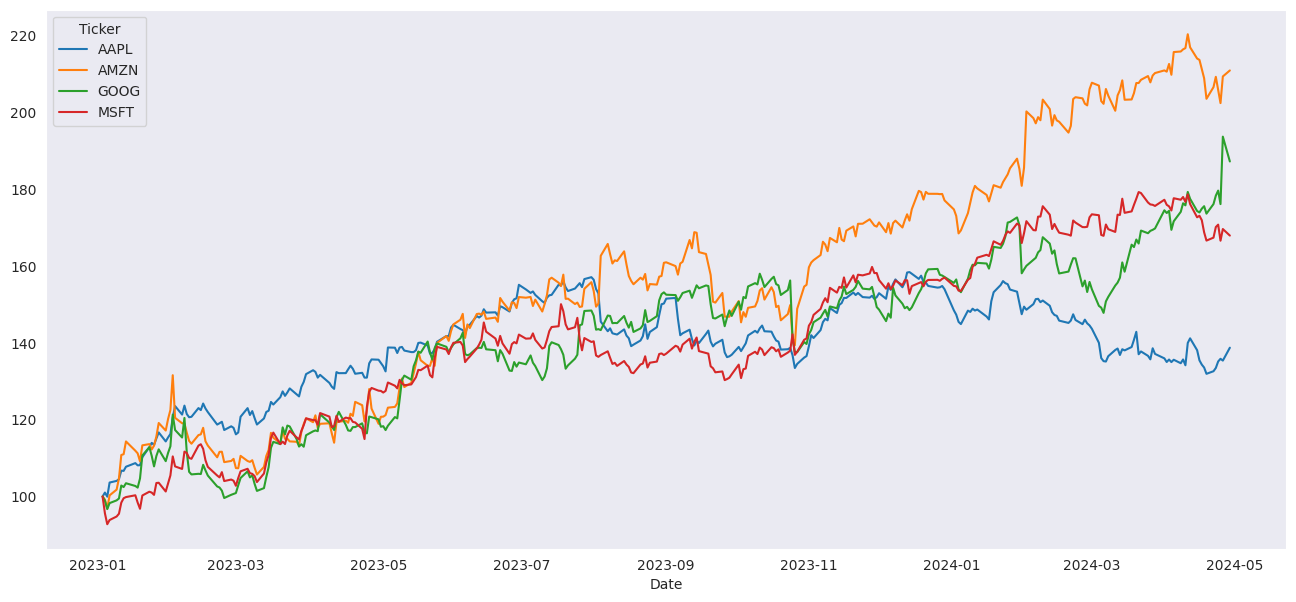

In [6]:
# use line plot to look at the performance of the companies
plt.figure(figsize=(16, 7))
sns.set_style('dark')
sns.lineplot(data=stocks , dashes=False)
plt.show()

Upon analyzing the line plot, it is shows that Amazon's stock has displayed the most pronounced upward trajectory. Although it experienced a downturn between September 2023 and November 2023, it has consistently risen since that period. Microsoft's stock exhibited a steady upward trend from January 2023 to April 2024, albeit encountering a setback more recently. Conversely, Apple's stock demonstrated the least pronounced upward movement compared to Amazon, Microsoft and Google. Google's stock displayed a upward trend but it experienced a downturn between February 2024 to March 2024.

In [7]:
# Calculate daily returns
stat = stocks.pct_change()
#get the summary statistics
stat = stat.describe().dropna()
stat

Ticker,AAPL,AMZN,GOOG,MSFT
count,331.000000,331.000000,331.000000,331.000000
mean,0.001072,0.002451,0.002085,0.001679
std,0.012867,0.019791,0.019478,0.015014
min,-0.048020,-0.084315,-0.095989,-0.043743
25%,-0.006851,-0.009504,-0.009012,-0.007111
50%,0.000758,0.001186,0.002220,0.001254
75%,0.008545,0.014587,0.011972,0.010688
max,0.046927,0.082693,0.099652,0.072435


In [8]:
#extract the average return which is the mean and volatility which the std
mtd = stat.T.loc[:,['mean', 'std']]
print(mtd)


            mean       std
Ticker                    
AAPL    0.001072  0.012867
AMZN    0.002451  0.019791
GOOG    0.002085  0.019478
MSFT    0.001679  0.015014


In [9]:
#Annualize the volatility and average return with the number of trading days in a year
mtd['mean'] = mtd['mean'] * 252
mtd['std'] = mtd['std'] * np.sqrt(252)

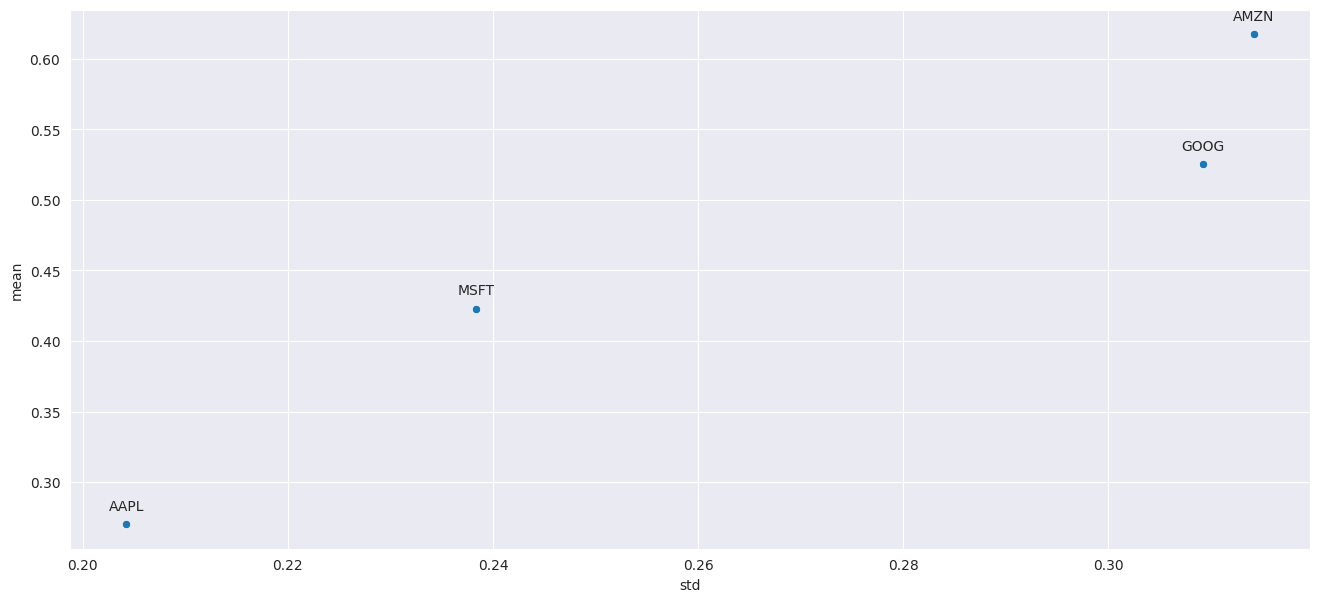

In [10]:
#use scatter plot to visualize the average return and volatility
plt.figure(figsize=(16, 7))
sns.set_style('darkgrid')  # Set the style
sns.scatterplot(data=mtd, x='std', y='mean')  # Plot using Seaborn
for i in mtd.index:
    plt.annotate(i, (mtd.loc[i,'std'], mtd.loc[i,'mean']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

High volatility indicates that the stock or market experiences large and frequent price movements, while low volatility indicates that the market experiences smaller or less frequent price movements. It is also known as Risk.

A high return for a stock indicates that its price has increased significantly over a specific period, while a low return for a stock indicates that its price has increased minimally or decreased over a specific period.

Amazon and Google stocks both offer high risk and high return.

In contrast, Apple stock displays low volatility and low return, while Microsoft stock presents a moderate level of risk and return.
